<a href="https://colab.research.google.com/github/SSDivyaRavali/CDS/blob/main/Module2/Calculus_for_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Calculus for Linear Regression

**DISCLAIMER:** THIS NOTEBOOK IS PROVIDED ONLY AS A REFERENCE SOLUTION NOTEBOOK FOR THE MINI-PROJECT. THERE MAY BE OTHER POSSIBLE APPROACHES/METHODS TO ACHIEVE THE SAME RESULTS.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform Linear Regression using different optimization algorithms - full batch gradient descent, RMSProp, Adam, Momentum

## Information

### Linear Regression

Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y). More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression; for more than one, the process is called multiple linear regression.

Here we limit to 2 dimensional space, thus a cartesian plane. Let us develop gradually from ground up starting with y=mx format and then y=mx+c regression.

##  Grading = 10 Points

Marks:

Exercise 1, 2, 5: Total marks = 0.5 x 3 = 1.5

Exercise 3, 4, 6, 7: Total marks = 1 x 4 = 4

Exercise 8, 9, 10: Total marks = 1.5 x 3 = 4.5

#### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Dataset

We will use Sweden insurance dataset to demonstrate simple linear regression. The dataset is called the “Auto Insurance in Sweden” dataset and involves predicting the **total payment for all the claims in thousands of Swedish Kronor (y)** given the total **number of claims (x)**.

**Exercise 1: Read the swedish_insurance.csv dataset and visualize total payment (y) vs number of claims (x).**

**Hint:** pd.read_csv()

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/swedish_insurance.csv

In [ ]:
# Read dataset
df = pd.read_csv("swedish_insurance.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


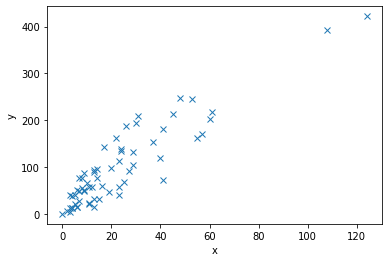

In [ ]:
# Visualize y vs x
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

plt.plot(x, y, 'x')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Simplified Scenario of $y = mx$

In this case, we are going to fit a line to data that passes through the origin. Let's develop the loss functions and see how it behaves.

$$y = mx \rightarrow h_{\theta}(x) = \theta x$$

$$J(\theta) = \frac{1}{2n} \sum_1^n (h_{\theta}(x_i) - y_i)^2$$

Note that we use the squared error divided by 2n where n is the number of data points. Therefore, we can consider this as a mean value. Precisely, this is the half of mean squared error. The intuition behind the division by 2 helps to have a more simplified derivate for the loss function.

Now if we plot the loss function for varying θ values we would get the plot shown below.

**Exercise 2: Create and plot the loss function for varying θ values.**

* create a function to compute mean squared error loss
$$J(\theta) = \frac{1}{2n} \sum_1^n (\theta x_i - y_i)^2$$
* compute loss for different theta values (50 points between 0 and 10)
* plot the computed loss corresponds to theta values

**Hint:** np.linspace()

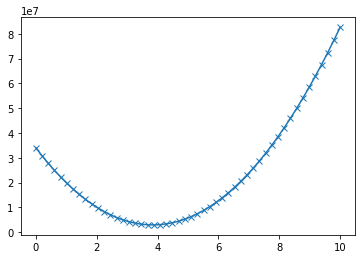

In [ ]:
theta_values = np.linspace(0, 10, 50)
loss_values1 = list()

# Create mean squared error loss function
def loss_function(theta, x, y):
    loss = list()
    for i in range(len(x)):
        loss.append((theta* x[i] - y[i])**2)
    return (1/2* len(x)) * sum(loss)

# Compute loss for different theta values
for i in range(len(theta_values)):
    loss_values1.append(loss_function(theta_values[i], x, y))

# Visualize the loss function
plt.plot(theta_values, loss_values1, 'x', linestyle='-')
plt.show()

Note that we have a minimum for the loss function closer to θ≈3.8. Let us see how we can arrive at this particular minima computationally.

### The Gradient Descent

Gradient descent is an optimization algorithm that's used when training a machine learning model. It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum.

The learning rate represents the step size and is denoted as $\alpha$. Smaller $\alpha$ value denotes the smaller step and slower the algorithm. However, taking a larger step could make us miss the minima. 

So we can formulate the change of θ as follows:

$$\theta = \theta - \alpha \frac{∂}{∂\theta}J(\theta)$$

where, 
$$\frac{∂}{∂\theta}J(\theta) = \frac{∂}{∂\theta} \frac{1}{2n} \sum_1^n (h_{\theta}(x_i) - y_i)^2$$

$$\frac{∂}{∂\theta}J(\theta) = \frac{∂}{∂\theta} \frac{1}{2n} \sum_1^n (\theta x_i - y_i)^2$$

$$\frac{∂}{∂\theta}J(\theta) = \frac{1}{n} \sum_1^n (\theta x_i - y_i)x_i$$


**Exercise 3: Create a function to evaluate the derivative of the loss function with respect to θ then perform gradient descent.**

* create a gradient function
* perform gradient descent for n number of iterations
* visualize the updates of theta
* tune learning rate and number of iterations for faster convergence

Hint: [Calculus behind Linear Regression](https://towardsdatascience.com/calculus-behind-linear-regression-1396cfd0b4a9).

In [ ]:
# Create a gradient function
def gradient_wrt_theta(theta, x, y):
    grad = list()
    for i in range(len(x)):
        grad.append(x[i]*(theta*x[i] - y[i]))
    return sum(grad)/len(x)

We can do the gradient descent iteratively until we meet minima or the number of iterations is reached.

In [ ]:
# Perform gradient descent

# initial theta
theta = 8
theta_updates = [theta]
loss_value = [loss_function(theta, x, y)]
# learning rate
lr = 0.0001
# number of iterations
n_iter = 90

for i in range(n_iter):
    theta = theta - lr * gradient_wrt_theta(theta, x, y)
    theta_updates.append(theta)
    loss_value.append(loss_function(theta, x, y))

We can visualize the gradient traversal as follows:

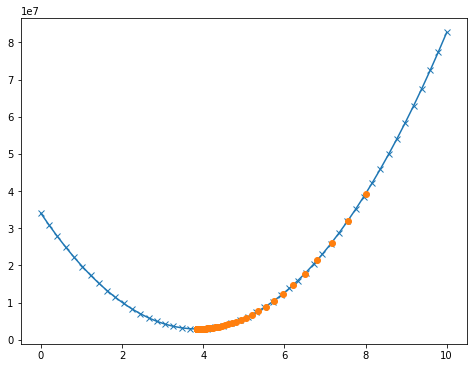

In [ ]:
# Visualize the updates of theta

plt.figure(figsize=(8, 6))
plt.plot(theta_values, loss_values1, 'x', linestyle='-')
plt.plot(theta_updates, loss_value, '.', markersize=12)
plt.show()

**Exercise 4: Visualize the final regression line along with the intermediate lines.**

* plot a regression line for every updated theta
* plot final regression line using the last theta value

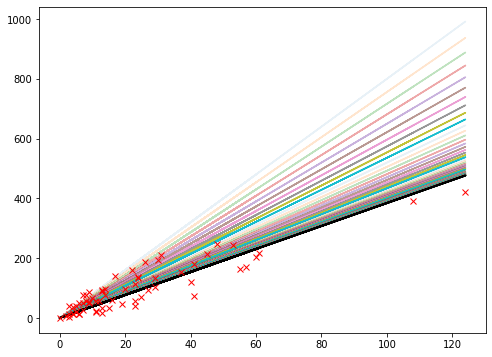

In [ ]:
# Visualize updates of Full Batch Gradient descent

plt.figure(figsize=(8, 6))
# plot intermediate lines
for i in range(len(theta_updates)):
    plt.plot(x, theta_updates[i]*x, alpha=(i+1)/10)

# plot final regression line
plt.plot(x, theta*x, 'k', linewidth=2)    
# plot data points
plt.plot(x, y, 'rx', markersize=6)
plt.show()

### Complete Scenario $y = mx + c$

This is the extension of the previous case and we can model the estimated equation and the loss function as follows:

$$y = mx + c \rightarrow h_{\theta}(x) = \theta_1 + \theta_2 x$$

$$J(\theta_1, \theta_2) = \frac{1}{2n} \sum_1^n (h_{\theta}(x_i) - y_i)^2$$



Now that we have a loss function with 2 variables, the loss function will be a 3D plot with the third axis corresponding to the loss value.

**Exercise 5: Create and plot the loss function for varying θ1 and θ2 values.**

**Hint:** np.arange(), np.meshgrid(), plt.axes(projection='3d'), ax.contour3D()

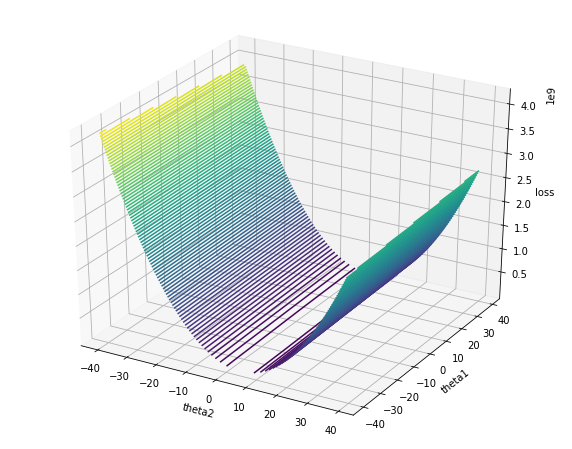

In [ ]:
# Create loss function
def loss_function1(theta1, theta2, x, y):
    loss = list()
    for i in range(len(x)):
        loss.append((theta1 + theta2 * x[i] - y[i])**2)
    return (1/2* len(x)) * sum(loss)

theta1_values = np.arange(-40, 40)
theta2_values = np.arange(-40, 40)

X, Y = np.meshgrid(theta1_values, theta2_values)
Z = loss_function1(X, Y, x, y)

# Visualize loss function
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(Y, X, Z, 100)
ax.set_xlabel('theta2')
ax.set_ylabel('theta1')
ax.set_zlabel('loss')
plt.show()

The gradient descent can be similarly derived to reach the following set of equations:

$$\theta_1 = \theta_1 - \alpha \frac{∂}{∂\theta_1}J(\theta_1,\theta_2) $$

$$\theta_2 = \theta_2 - \alpha \frac{∂}{∂\theta_2}J(\theta_1,\theta_2) $$

$$\frac{∂}{∂\theta_1}J(\theta_1, \theta_2) = \frac{1}{n} \sum_1^n (\theta_1 + \theta_2 x_i - y_i)$$

$$\frac{∂}{∂\theta_2}J(\theta_1, \theta_2) = \frac{1}{n} \sum_1^n (\theta_1 + \theta_2 x_i - y_i)x_i$$

Note that the gradients must be updated simultaneously so that update of one θ value will not affect the other.

**Exercise 6: Create a function to evaluate the derivative of the loss function with respect to θ1 and θ2 then perform gradient descent.**

* create one gradient function for each theta1 and theta2 
* perform gradient descent for n number of iterations
* visualize the updates of theta1 and theta2
* tune learning rate and number of iterations for faster convergence

In [ ]:
# Create gradient functions
def gradient_wrt_theta1(theta1, theta2, x, y):
    grad = list()
    for i in range(len(x)):
        grad.append(theta1 + theta2*x[i] - y[i])
    return sum(grad)/len(x)

def gradient_wrt_theta2(theta1, theta2, x, y):
    grad = list()
    for i in range(len(x)):
        grad.append(x[i]*(theta1 + theta2*x[i] - y[i]))
    return sum(grad)/len(x)

We can do the gradient descent iteratively until we meet a minima or the number of iterations are reached.


In [ ]:
# Perform gradient descent

# initial thetas
theta1 = 20
theta2 = 10
theta1_updates = [theta1]
theta2_updates = [theta2]
loss_values1 = [loss_function1(theta1, theta2, x, y)]
# learning rate
lr = 0.0001
# number of iterations
n_iter = 200

for i in range(n_iter):
    theta1 = theta1 - lr * gradient_wrt_theta1(theta1, theta2, x, y)
    theta2 = theta2 - lr * gradient_wrt_theta2(theta1, theta2, x, y)
    theta1_updates.append(theta1)
    theta2_updates.append(theta2)
    loss_values1.append(loss_function1(theta1, theta2, x, y))

We can visualize the descent over the gradient of the loss function as follows:

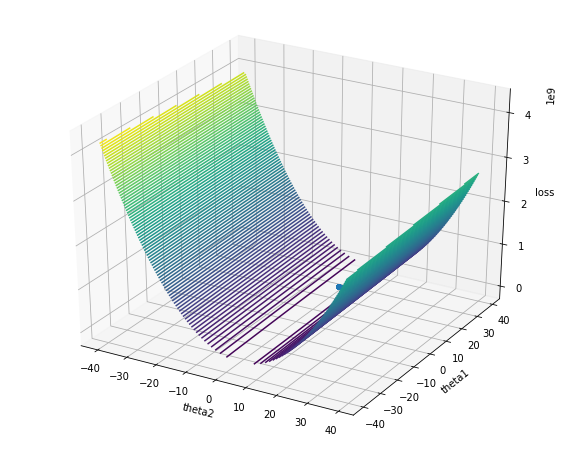

In [ ]:
# Visualize the updates of theta1, theta2

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(Y, X, Z, 100)
ax.scatter(theta2_updates, theta1_updates, loss_values1, '.')
ax.set_xlabel('theta2')
ax.set_ylabel('theta1')
ax.set_zlabel('loss')
plt.show()

**Exercise 7: Visualize the final regression line along with the intermediate lines.**

* plot a regression line for every updated theta1 and theta2
* plot final regression line using the last theta1 and theta2 values

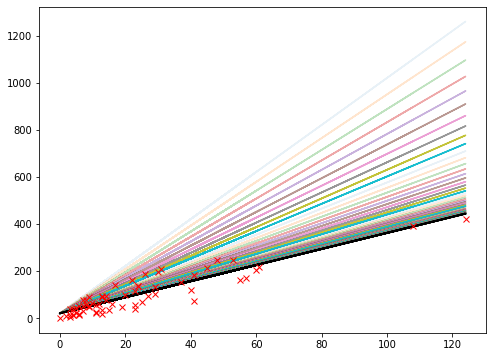

In [ ]:
# Visualize updates of Gradient descent

plt.figure(figsize=(8, 6))
# plot intermediate lines
for i in range(len(theta1_updates)):
    plt.plot(x, theta2_updates[i]*x + theta1_updates[i], alpha=(i+1)/10)

# plot final regression line
plt.plot(x, theta2*x + theta1, 'k', linewidth=2)    
# plot data points
plt.plot(x, y, 'rx', markersize=6)
plt.show()

In [ ]:
# Parameter values
theta1, theta2

(19.859219891750307, 3.416744124534184)

From the above result, we can see that the above values for the intercept and gradient respectively in the final fit are reasonable.

### RMSProp 

Using RMSProp optimization to find the minima of the cost function.

Weights update is given as: 

$$E[g^2]_t = \beta E[g^2]_{t-1} + (1-\beta)(\frac{∂c}{∂w})^2$$

$$w_t = w_{t-1} - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}}(\frac{∂c}{∂w})$$

where $E[g^2]$ is the moving average of squared gradients, $∂c/∂w$ is gradient of the cost function with respect to the weight, $\eta$ is the learning rate and $\beta$ is moving average parameter (default value 0.9). The $\epsilon$ is a small scalar (e.g. $10^{-8}$) used to prevent division by 0.

**Exercise 8: Perform the optimization steps using RMSProp optimization.**

* perform rmsprop optimization for n number of iterations
* visualize the updates of theta1 and theta2
* tune learning rate and number of iterations for faster convergence
* plot a regression line for every updated theta1 and theta2
* plot final regression line using the last theta1 and theta2 values

In [ ]:
# RMSProp optimization
theta1 = 10
theta2 = 5

theta1_updates = [theta1]
theta2_updates = [theta2]
loss_values2 = [loss_function1(theta1, theta2, x, y)]
# learning rate
lr = 0.01
# number of iterations
n_iter = 300

eps=1e-8
beta = 0.9
# initialize moving average of squared gradients
E1 = 0.0
E2 = 0.0

for i in range(n_iter):
    E1 = beta * E1 + (1-beta) * gradient_wrt_theta1(theta1, theta2, x, y)**2
    E2 = beta * E2 + (1-beta) * gradient_wrt_theta2(theta1, theta2, x, y)**2
    # update variables
    theta1 = theta1 - lr * gradient_wrt_theta1(theta1, theta2, x, y) / (np.sqrt(E1) + eps)
    theta2 = theta2 - lr * gradient_wrt_theta2(theta1, theta2, x, y) / (np.sqrt(E2) + eps)

    theta1_updates.append(theta1)
    theta2_updates.append(theta2)

    loss_values2.append(loss_function1(theta1, theta2, x, y))

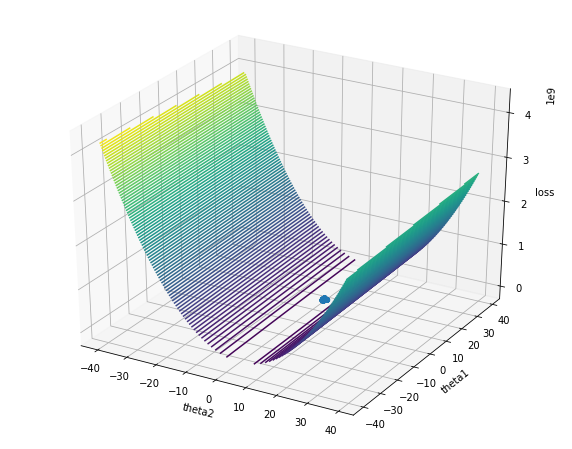

In [ ]:
# Visualize the updates of theta1, theta2

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(Y, X, Z, 100)
ax.scatter(theta2_updates, theta1_updates, loss_values2, '.')
ax.set_xlabel('theta2')
ax.set_ylabel('theta1')
ax.set_zlabel('loss')
plt.show()

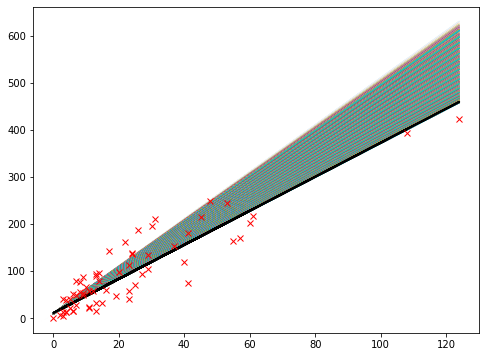

In [ ]:
# Visualize updates of RMSProp

plt.figure(figsize=(8, 6))
# plot intermediate lines
for i in range(len(theta1_updates)):
    plt.plot(x, theta2_updates[i]*x + theta1_updates[i], alpha=(i+1)/10)

# plot final regression line
plt.plot(x, theta2*x + theta1, 'k', linewidth=2)    
# plot data points
plt.plot(x, y, 'rx', markersize=6)
plt.show()

In [ ]:
# Parameter values
theta1, theta2

(10.88344398326191, 3.6153999570775857)

### Adam

Using Adam optimization to find the minima of the cost function.

Weights update is given as: 

$$m_w^{(t+1)} \leftarrow \beta_1m_w^{(t)} + (1-\beta_1)∇_wL^{(t)},$$

$$v_w^{(t+1)} \leftarrow \beta_2v_w^{(t)} + (1-\beta_2)(∇_wL^{(t)})^2,$$

$$\hat{m}_w = \frac{m_w^{(t+1)}}{1-\beta_1^{t+1}},$$  

$$\hat{v}_w = \frac{v_w^{(t+1)}}{1-\beta_2^{t+1}},$$

$$w^{(t+1)} \leftarrow w^{(t)} - \eta\frac{\hat{m}_w}{\sqrt{\hat{v}_w}+\epsilon}$$

where $\epsilon$  is a small scalar (e.g. $10^{-8}$) used to prevent division by 0, and $\beta _{1}$ (e.g. 0.9) and $\beta _{2}$ (e.g. 0.999) are the forgetting factors for gradients and second moments of gradients, respectively. Squaring and square-rooting is done elementwise.

**Exercise 9: Perform the optimization steps using Adam optimization.**

* perform adam optimization for n number of iterations
* visualize the updates of theta1 and theta2
* tune learning rate and number of iterations for faster convergence
* plot a regression line for every updated theta1 and theta2
* plot final regression line using the last theta1 and theta2 values

In [ ]:
# Adam optimization
theta1 = 10
theta2 = 5

theta1_updates = [theta1]
theta2_updates = [theta2]
loss_values3 = [loss_function1(theta1, theta2, x, y)]
# learning rate
lr = 0.01
# number of iterations
n_iter = 400

eps=1e-8
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# initialize
M1 = 0.0
M2 = 0.0
V1 = 0.0
V2 = 0.0

for i in range(n_iter):
    M1 = beta1 * M1 + (1.0 - beta1) * gradient_wrt_theta1(theta1, theta2, x, y)
    V1 = beta2 * V1 + (1.0 - beta2) * gradient_wrt_theta1(theta1, theta2, x, y)**2
    Mhat_1 = M1 / (1.0 - beta1**(i+1))
    Vhat_1 = V1 / (1.0 - beta2**(i+1))
    # update variable
    theta1 = theta1 - lr * Mhat_1 / (np.sqrt(Vhat_1) + eps)

    M2 = beta1 * M2 + (1.0 - beta1) * gradient_wrt_theta2(theta1, theta2, x, y)
    V2 = beta2 * V2 + (1.0 - beta2) * gradient_wrt_theta2(theta1, theta2, x, y)**2
    Mhat_2 = M2 / (1.0 - beta1**(i+1))
    Vhat_2 = V2 / (1.0 - beta2**(i+1))
    # update variable
    theta2 = theta2 - lr * Mhat_2 / (np.sqrt(Vhat_2) + eps)
    
    theta1_updates.append(theta1)
    theta2_updates.append(theta2)

    loss_values2.append(loss_function1(theta1, theta2, x, y))

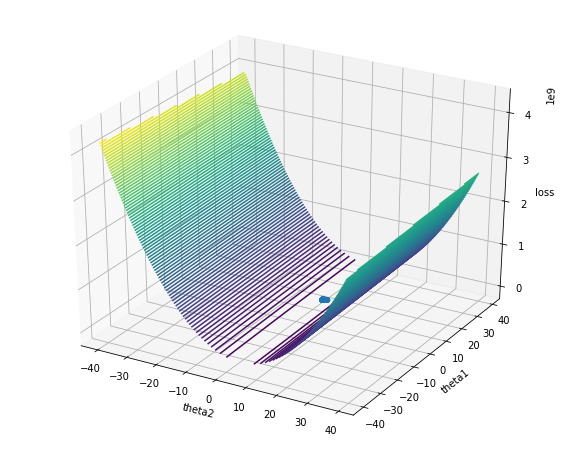

In [ ]:
# Visualize the updates of theta1, theta2

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(Y, X, Z, 100)
ax.scatter(theta2_updates, theta1_updates, loss_values3, '.')
ax.set_xlabel('theta2')
ax.set_ylabel('theta1')
ax.set_zlabel('loss')
plt.show()

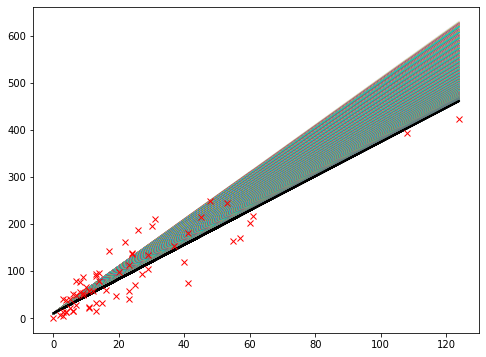

In [ ]:
# Visualize updates of Adam

plt.figure(figsize=(8, 6))
# plot intermediate lines
for i in range(len(theta1_updates)):
    plt.plot(x, theta2_updates[i]*x + theta1_updates[i], alpha=(i+1)/10)

# plot final regression line
plt.plot(x, theta2*x + theta1, 'k', linewidth=2)    
# plot data points
plt.plot(x, y, 'rx', markersize=6)
plt.show()

In [ ]:
# Parameter values
theta1, theta2

(10.014663603327726, 3.6374245098540285)

### Momentum optimization

Using Momentum optimization to find the minima of the cost function.

Momentum involves maintaining the change in the position and using it in the subsequent calculation of the change in position.

If we think of updates over time, then the update at the current iteration or time (t) will add the change used at the previous time (t-1) weighted by the momentum hyperparameter, as follows:

$$change\_w_t = step\_size * f'(w_{t-1})\ +\ momentum * change\_w_{t-1}$$

The update to the position is then performed as before.

$$w_t = w_{t-1}\ –\ change\_w_t$$

The change in the position accumulates the magnitude and direction of changes over the iterations of the search, proportional to the size of the momentum hyperparameter.

**Exercise 10: Perform the optimization steps using Momentum optimization.**

* perform momentum optimization for n number of iterations
* visualize the updates of theta1 and theta2
* tune learning rate and number of iterations for faster convergence
* plot a regression line for every updated theta1 and theta2
* plot final regression line using the last theta1 and theta2 values

In [ ]:
# Momentum optimization
# initialize
theta1 = 10
theta2 = 5

theta1_updates = [theta1]
theta2_updates = [theta2]
loss_values4 = [loss_function1(theta1, theta2, x, y)]
# learning rate
lr = 0.0001
# number of iterations
n_iter = 80

momentum = 0.5
change_1 = 0
change_2 = 0

for i in range(n_iter):
    # calculate update
    new_change_1 = lr * gradient_wrt_theta1(theta1, theta2, x, y)  +  momentum * change_1
    new_change_2 = lr * gradient_wrt_theta2(theta1, theta2, x, y)  +  momentum * change_2

    # take a step
    theta1 = theta1 - new_change_1
    theta2 = theta2 - new_change_2
    # save the change
    change_1 = new_change_1
    change_2 = new_change_2

    theta1_updates.append(theta1)
    theta2_updates.append(theta2)

    loss_values4.append(loss_function1(theta1, theta2, x, y))

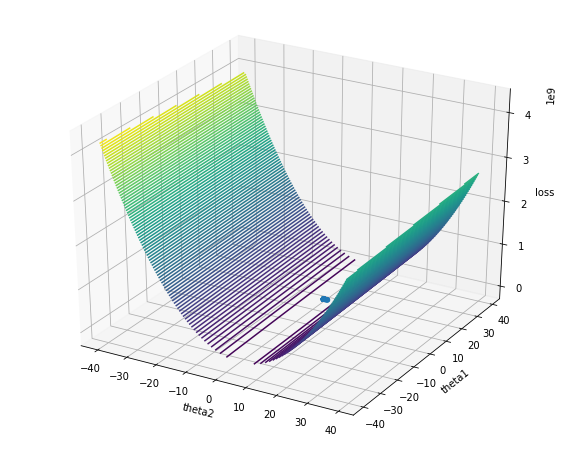

In [ ]:
# Visualize the updates of theta1, theta2

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(Y, X, Z, 100)
ax.scatter(theta2_updates, theta1_updates, loss_values4, '.')
ax.set_xlabel('theta2')
ax.set_ylabel('theta1')
ax.set_zlabel('loss')
plt.show()

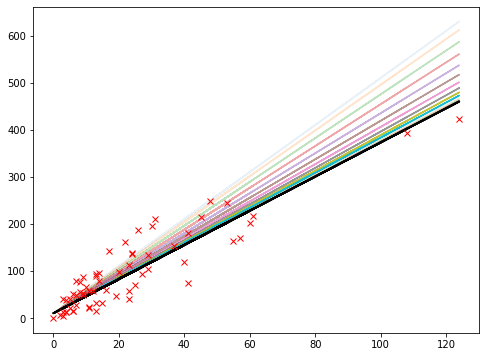

In [ ]:
# Visualize updates of Momentum optimizer

plt.figure(figsize=(8, 6))
# plot intermediate lines
for i in range(len(theta1_updates)):
    plt.plot(x, theta2_updates[i]*x + theta1_updates[i], alpha=(i+1)/10)

# plot final regression line
plt.plot(x, theta2*x + theta1, 'k', linewidth=2)    
# plot data points
plt.plot(x, y, 'rx', markersize=6)
plt.show()

In [ ]:
# Parameter values
theta1, theta2

(10.050167554481966, 3.6285449727482573)

Discussions:

* Compare the RMSProp and Adam optimizers.
* What will happen if we take the different learning rates for theta1 and theta2 for all optimizers?
* What is the significance of momentum factor in Momentum optimization?